# Matplotlib

*Aparté*

Les librairies de visualisation en python se sont beaucoup développées ([10 plotting librairies](http://www.xavierdupre.fr/app/jupytalk/helpsphinx/2016/pydata2016.html)). 

La référence reste [matplotlib](http://matplotlib.org/), et la plupart sont pensées pour être intégrées à ses objets (c'est par exemple le cas de [seaborn](https://stanford.edu/~mwaskom/software/seaborn/introduction.html), [mpld3](http://mpld3.github.io/), [plotly](https://plot.ly/) et [bokeh](http://bokeh.pydata.org/en/latest/)). Il est donc utile de commencer par se familiariser avec matplotlib.

Pour reprendre les termes de ses développeurs : *"matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MatLab or mathematica), web application servers, and six graphical user interface toolkits."*


La structure sous-jacente de matplotlib est très générale et personnalisable (gestion de l'interface utilisateur, possibilité d'intégration dans des applications web, etc.). Heureusement, il n'est pas nécessaire de maîtriser l'ensemble de ces méthodes pour produire un graphe (il existe pas moins de 2840 pages de [documentation](http://matplotlib.org/Matplotlib.pdf)). Pour générer des graphes et les modifier, il suffit de passer par l'interface [pyplot](). 

L'interface pyplot est inspirée de celle de MATLAB. Ceux qui la connaissent s'y retrouveront rapidement. 

Pour résumer : 
- matplotlib - accès "low level" à la librairie de visualisation. Utile si vous souhaitez créer votre propre librairie de visualisation python ou faire des choses très custom.
- matplotlib.pyplot - interface proche de celle de Matplab pour produire vos graphes
- pylab - matplotlib.pyplot + numpy

In [ ]:
#Pour intégrer les graphes à votre notebook, il suffit de faire
%matplotlib inline

In [ ]:
#ou alors
%pylab inline
#pylab charge également numpy. C'est la commande du calcul scientifique python.

Populating the interactive namespace from numpy and matplotlib


La structure des objets décrits par l'API est très hierarchique, comme illustré par ce schéma :
- "Figure" contient l'ensemble de la représentation visuelle. C'est par exemple grâce à cette méta-structure que l'on peut facilement ajouter un titre à une représentation qui contiendrait plusieurs graphes ;
- "Axes" (ou "Subplots") décrit l'ensemble contenant un ou pusieurs graphes (correspond à l'objet subplot et aux méthodes add_subplot)
- "Axis" correspond aux axes d'un graphique (ou instance de subplot) donné. 

<img src="http://matplotlib.org/_images/fig_map.png" />

Une dernière remarque d'ordre général : [pyplot est une machine à état](https://en.wikipedia.org/wiki/Matplotlib).
Cela implique que les méthodes pour tracer un graphe ou éditer un label s'appliquent par défaut au dernier état en cours (dernière instance de subplot ou dernière instance d'axe par exemple). 

Conséquence : il faut concevoir ses codes comme une séquence d'instructions (par exemple, il ne faut pas séparer les instructions qui se rapportent au même graphique dans deux cellules différentes du Notebook).

### Figures et Subplots 

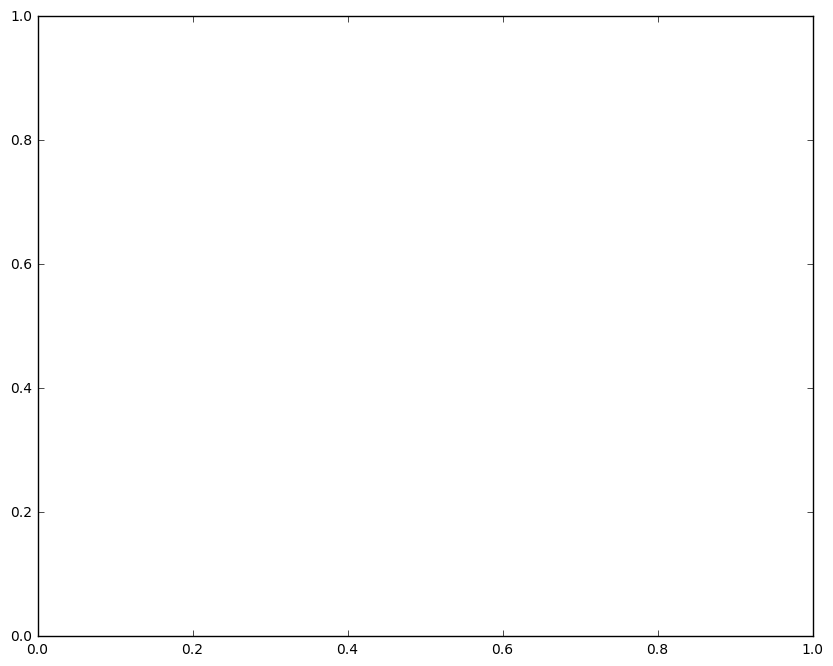

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(111) # Méthode subplot : pour définir les graphiques appartenant à l'objet figure, ici 1 X 1, indice 1
#plt.subplot(1,1,1) fonctionne aussi
#attention, il est nécessaire de conserver toutes les instructions d'un même graphique dans le même bloc 
#pas besoin de plt.show() dans un notebook, sinon c'est nécessaire

Un graphique (très) simple avec l'instruction plot.

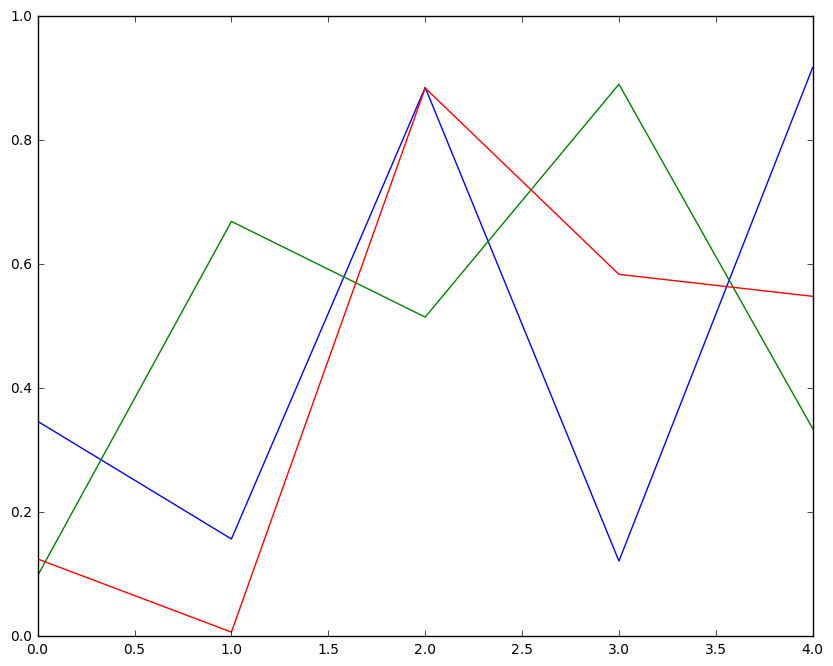

In [ ]:
from numpy import random
import numpy as np
import pandas as p

plt.figure(figsize=(10,8))
plt.subplot(111)
plt.plot([random.random_sample(1) for i in range(5)])
#Il est possible de passer des listes, des arrays de numpy, des Series et des Dataframes de pandas
plt.plot(np.array([random.random_sample(1) for i in range(5)]))
plt.plot(p.DataFrame(np.array([random.random_sample(1) for i in range(5)])))
#pour afficher plusieurs courbes, il suffit de cumuler les instructions plt.plot
#plt.show()

Pour faire plusieurs sous graphes, il suffit de modifier les valeurs des paramètres de l'objet subplot.

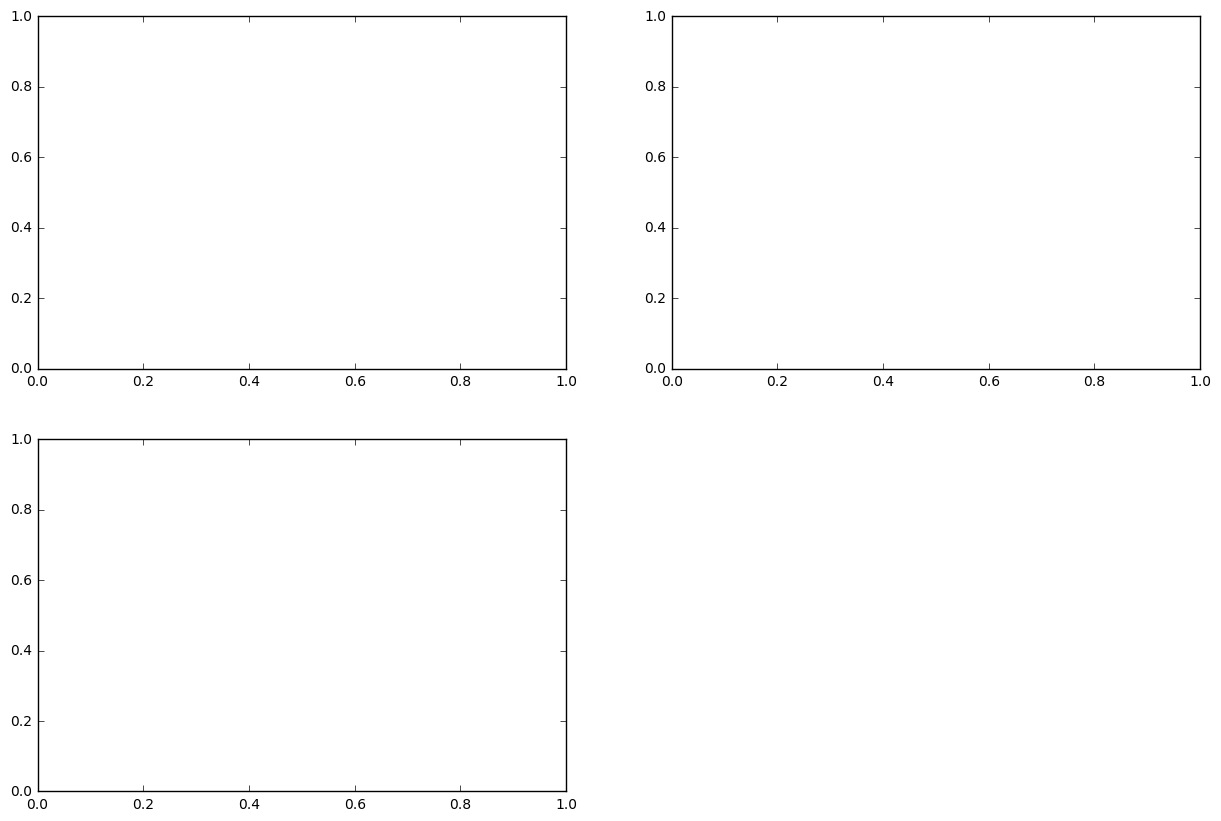

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1) #modifie l'objet fig et créé une nouvelle instance de subplot, appelée ax1
#vous verrez souvent la convention ax comme instance de subplot : c'est parce que l'on parle aussi d'objet "Axe"
#à ne pas confondre avec l'objet "Axis"
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Si aucune instance d'axes n'est précisée, la méthode plot est appliquée à la dernière instance créée.

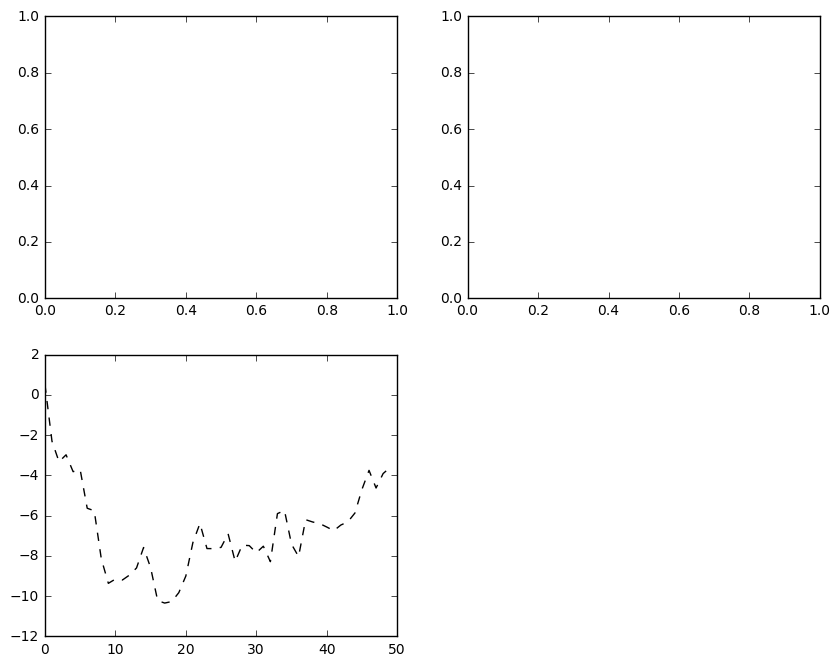

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(randn(50).cumsum(),'k--')
plt.show()

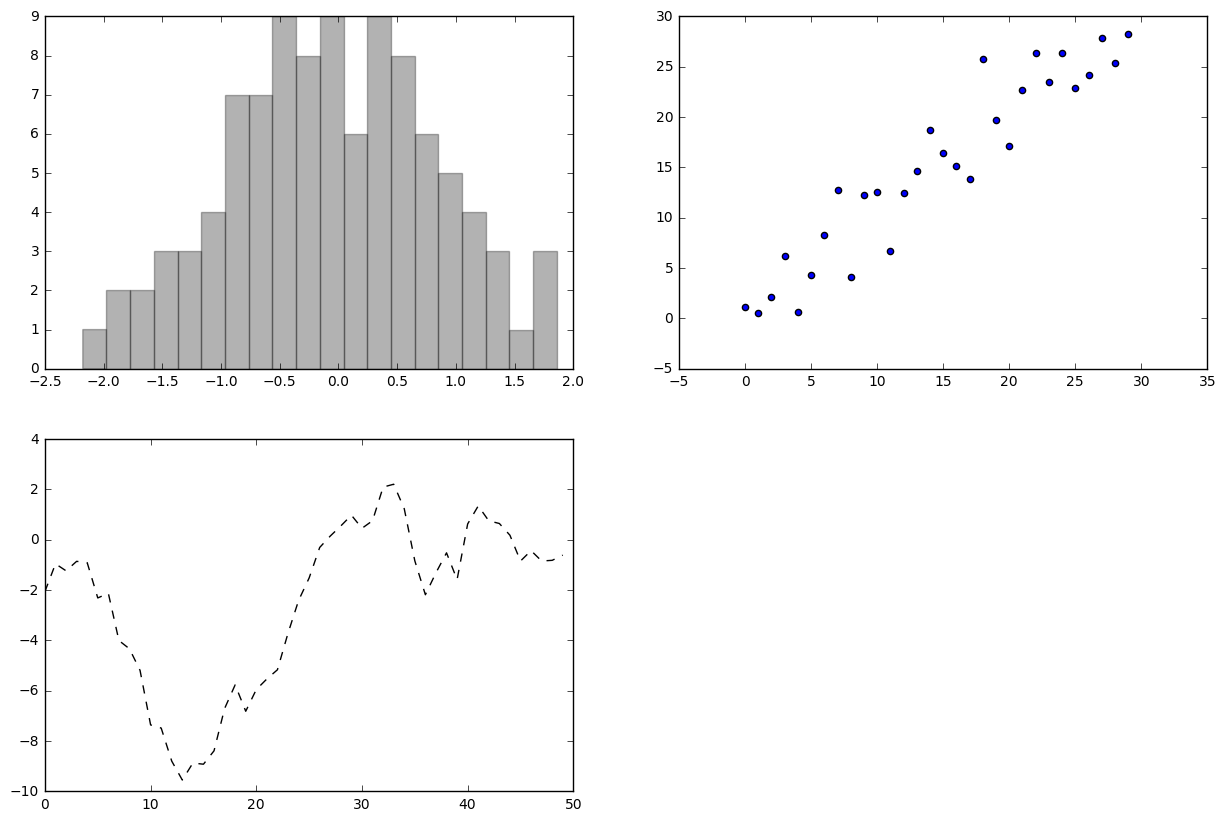

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# On peut compléter les instances de sous graphiques par leur contenu.
# Au passage, quelques autres exemples de graphes
ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))
ax3.plot(randn(50).cumsum(),'k--')

Pour explorer l'ensemble des catégories de graphiques possibles : [Gallery](http://matplotlib.org/gallery.html). Les plus utiles pour l'analyse de données : [scatter](http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html), [scatterhist](http://matplotlib.org/examples/axes_grid/scatter_hist.html), [barchart](http://matplotlib.org/examples/pylab_examples/barchart_demo.html), [stackplot](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html), [histogram](http://matplotlib.org/examples/statistics/histogram_demo_features.html), [cumulative distribution function](http://matplotlib.org/examples/statistics/histogram_demo_cumulative.html), [boxplot](http://matplotlib.org/examples/statistics/boxplot_vs_violin_demo.html), , [radarchart](http://matplotlib.org/examples/api/radar_chart.html).

### Ajuster les espaces entre les graphes

<class 'numpy.ndarray'>


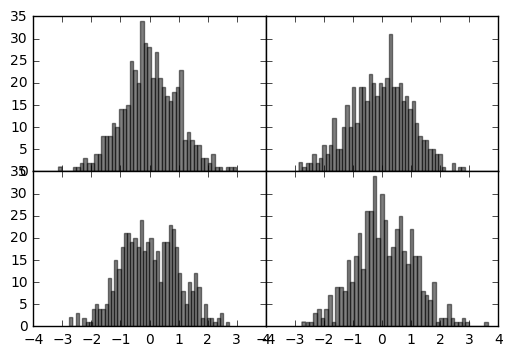

In [ ]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
# Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
# ont des axes paramétrés de la même manière
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
# L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
print(type(axes))

# N'h'ésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
plt.subplots_adjust(wspace=0,hspace=0)
# Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

Pas d'autres choix que de paramétrer à la main pour corriger les chiffres qui se superposent.

### Couleurs, Marqueurs et styles de ligne

MatplotLib offre la possibilité d'adopter deux types d'écriture : chaîne de caractère condensée ou paramétrage explicite via un système clé-valeur.

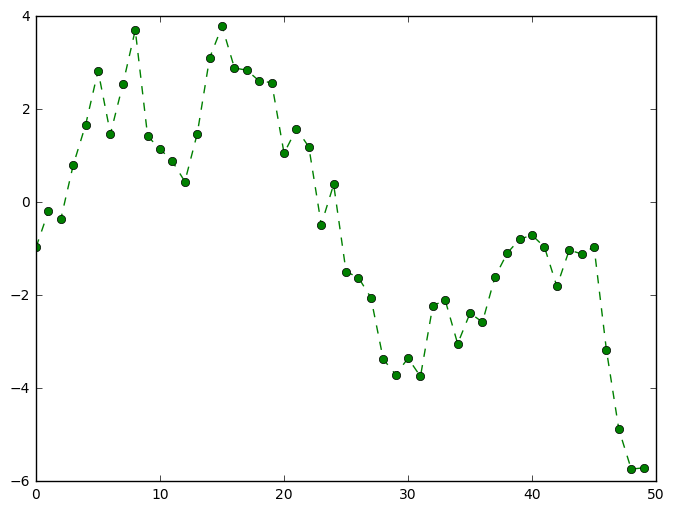

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(randn(50).cumsum(),color='g',marker='o',linestyle='dashed')
plt.show()

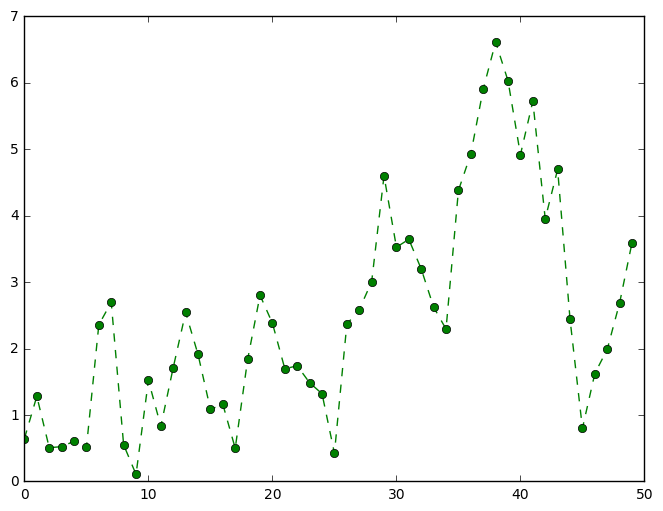

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(randn(50).cumsum(),'og--') #l'ordre des paramètres n'importe pas

Plus de détails dans la documentation sur l'API de matplotlib pour paramétrer la
<a href="http://matplotlib.org/api/colors_api.html">
couleur
</a>
, les
<a href="http://matplotlib.org/api/markers_api.html">
markers
</a>
, et le
<a href="http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle">
style des lignes
</a>
. MatplotLib est compatible avec plusieurs standards de couleur :
- sous forme d'une lettre : 'b' = blue (bleu), 'g' = green (vert), 'r' = red (rouge), 'c' = cyan (cyan), 'm' = magenta (magenta), 'y' = yellow (jaune), 'k' = black (noir), 'w' = white (blanc).
- sous forme d'un nombre entre 0 et 1 entre quotes qui indique le niveau de gris : par exemple '0.70' ('1' = blanc, '0' = noir).
- sous forme d'un nom : par exemple 'red'.
- sous forme html avec les niveaux respectifs de rouge (R), vert (G) et bleu (B) : '#ffee00'. Voici un site pratique pour récupérer une couleur en [RGB hexadécimal](http://www.proftnj.com/RGB3.htm). 
- sous forme d'un triplet de valeurs entre 0 et 1 avec les niveaux de R, G et B : (0.2, 0.9, 0.1).

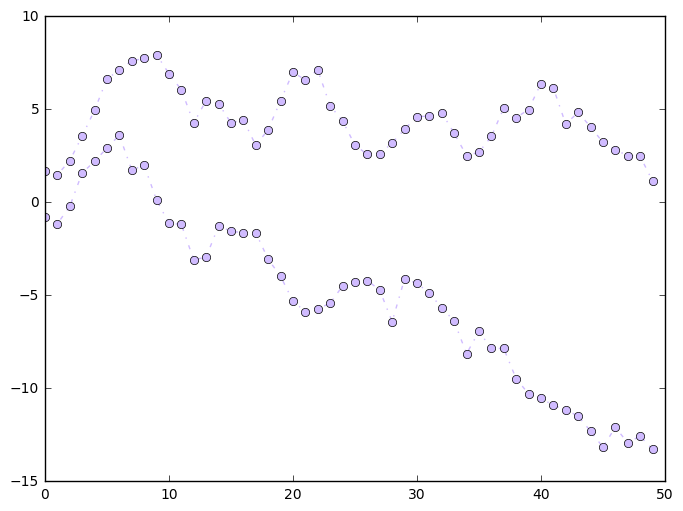

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
#avec la norme RGB
ax1.plot(randn(50).cumsum(),color='#D0BBFF',marker='o',linestyle='-.')
ax1.plot(randn(50).cumsum(),color=(0.8156862745098039, 0.7333333333333333, 1.0),marker='o',linestyle='-.')

### Ticks labels et legendes 

3 méthodes clés : 
- xlim() : pour délimiter l'étendue des valeurs de l'axe
- xticks() : pour passer les graduations sur l'axe
- xticklabels() : pour passer les labels

Pour l'axe des ordonnées c'est ylim, yticks, yticklabels.

Pour récupérer les valeurs fixées : 
- plt.xlim() ou plt.get_xlim()
- plt.xticks() ou plt.get_xticks()
- plt.xticklabels() ou plt.get_xticklabels()
    
Pour fixer ces valeurs :
- plt.xlim([start,end]) ou plt.set_xlim([start,end])
- plt.xticks(my_ticks_list) ou plt.get_xticks(my_ticks_list)
- plt.xticklabels(my_labels_list) ou plt.get_xticklabels(my_labels_list)

Si vous voulez customiser les axes de plusieurs sous graphiques, passez par une [instance de axis](http://matplotlib.org/users/artists.html) et non subplot.

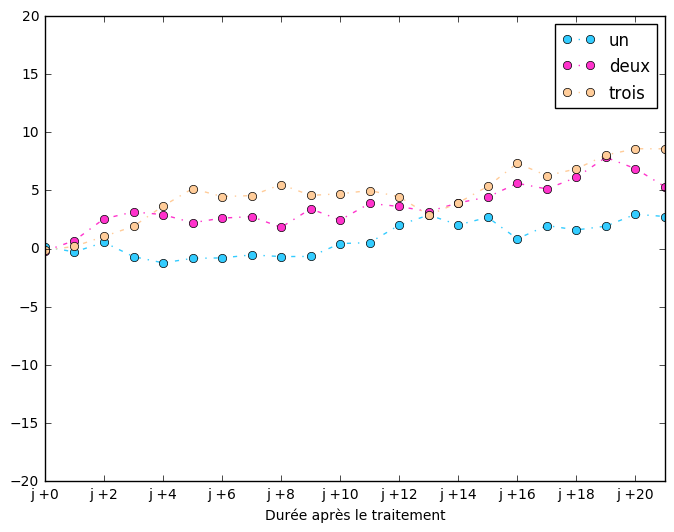

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

serie1=randn(50).cumsum()
serie2=randn(50).cumsum()
serie3=randn(50).cumsum()
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

#sur le graphe précédent, pour raccourcir le range
ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
#faire un ticks avec un pas de 2 (au lieu de 5)
ax1.set_xticks(range(0,21,2))
#changer le label sur la graduation
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.legend(loc='best')
#permet de choisir l'endroit le plus vide

### Inclusion d'annotation et de texte, titre et libellé des axes 

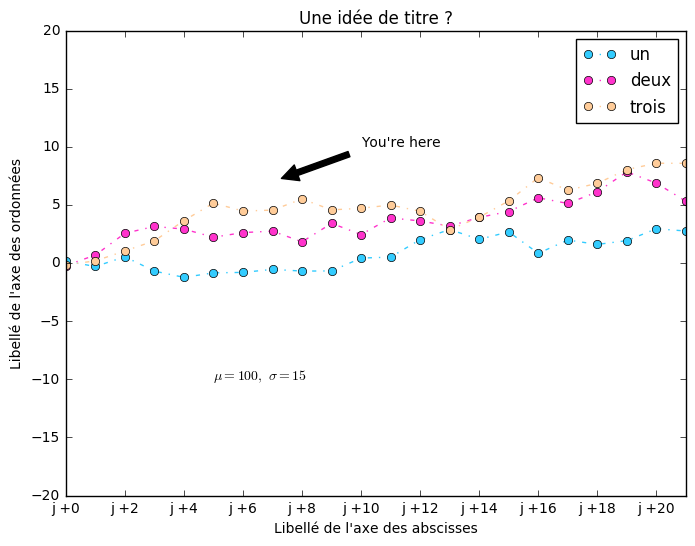

In [ ]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
ax1.set_xticks(range(0,21,2))
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.annotate("You're here", xy=(7, 7), #point de départ de la flèche
             xytext=(10, 10),          #position du texte
            arrowprops=dict(facecolor='#000000', shrink=0.10),
            )

ax1.legend(loc='best')

plt.xlabel("Libellé de l'axe des abscisses")
plt.ylabel("Libellé de l'axe des ordonnées")
plt.title("Une idée de titre ?")
plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

plt.show()

### matplotlib et le style

Il est possible de définir son propre style. Cette possibilité est intéressante si vous faîtes régulièrement les mêmes graphes et voulez définir des templates (plutôt que de copier/coller toujours les mêmes lignes de code). Tout est décrit [ici](http://matplotlib.org/users/style_sheets.html).

Une alternative consiste à utiliser des feuilles de styles pré-définies. Par exemple [ggplot](http://blog.yhat.com/posts/ggplot-for-python.html), librairie très utilisée sous R.

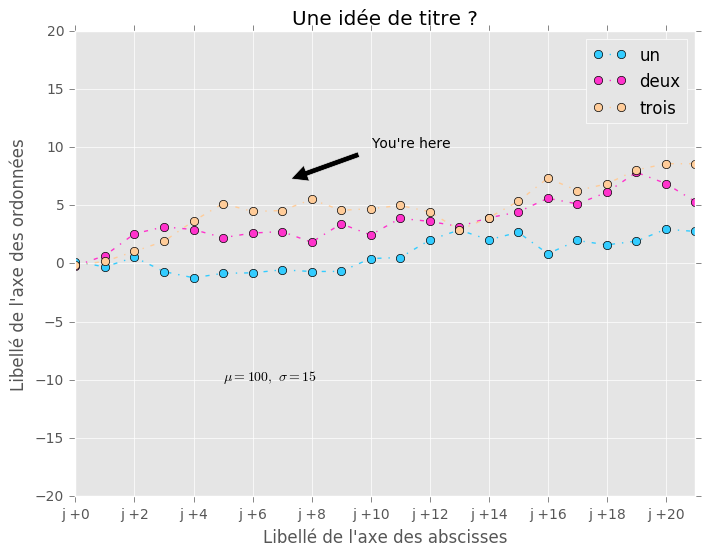

In [ ]:
from numpy.random import randn

#pour que la définition du style soit seulement dans cette cellule notebook
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
    ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
    ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

    ax1.set_xlim([0,21])
    ax1.set_ylim([-20,20])
    ax1.set_xticks(range(0,21,2))
    ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
    ax1.set_xlabel('Durée après le traitement')

    ax1.annotate("You're here", xy=(7, 7), #point de départ de la flèche
                 xytext=(10, 10),          #position du texte
                arrowprops=dict(facecolor='#000000', shrink=0.10),
                )

    ax1.legend(loc='best')

    plt.xlabel("Libellé de l'axe des abscisses")
    plt.ylabel("Libellé de l'axe des ordonnées")
    plt.title("Une idée de titre ?")
    plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

    plt.show()

De nombreux autres styles sont disponibles, pick up your choice!  ['bmh', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-dark', 'seaborn-ticks', 'grayscale', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-bright', 'ggplot', 'classic', 'seaborn-deep', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-poster', 'fivethirtyeight', 'seaborn-white', 'dark_background', 'seaborn-muted', 'seaborn-notebook']


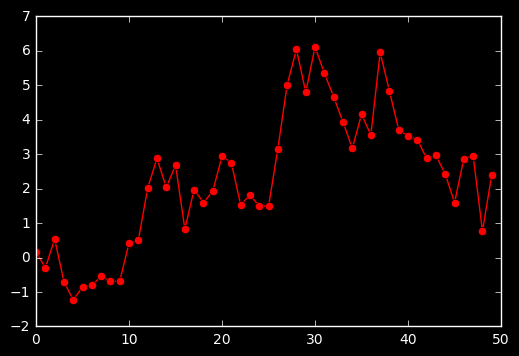

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("De nombreux autres styles sont disponibles, pick up your choice! ", plt.style.available)
with plt.style.context('dark_background'):
    plt.plot(serie1, 'r-o')

plt.show()

Comme suggéré dans le nom des styles disponibles dans matplotlib, la librairie seaborn, qui est une sorte de surcouche de matplotlib, est un moyen très pratique d'accéder à des styles pensés et adaptés pour la mise en valeur de pattern dans les données.

Voici quelques exemples, toujours sur la même série de données. Je vous invite également à explorer les [palettes de couleurs](https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html).

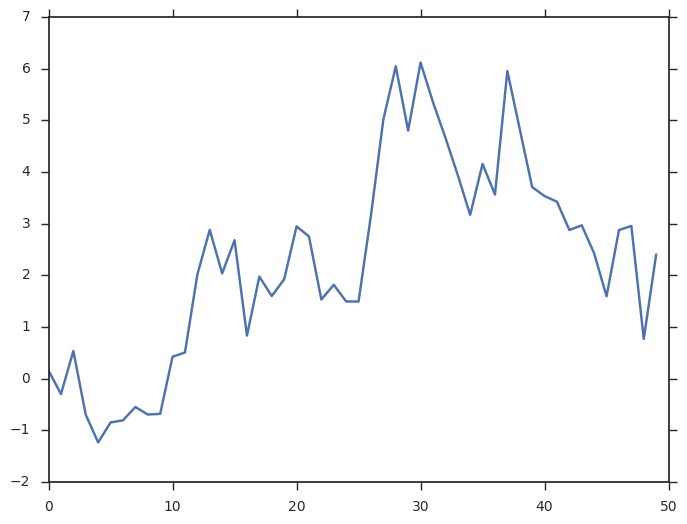

In [ ]:
#on peut remarquer que le style ggplot est resté. 
import seaborn as sns

#5 styles disponibles
#sns.set_style("whitegrid")
#sns.set_style("darkgrid")
#sns.set_style("white")
#sns.set_style("dark")
#sns.set_style("ticks")

#si vous voulez définir un style temporairement
with sns.axes_style("ticks"):
    fig = plt.figure(figsize(8,6))
    ax1 = fig.add_subplot(1,1,1)
    plt.plot(serie1)

En dehors du style et des couleurs, Seaborn a mis l'accent sur :
- les graphes de distribution ([univariés](https://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html#distplot-options) / [bivariés](https://stanford.edu/~mwaskom/software/seaborn/examples/joint_kde.html#joint-kde)). Particulièrement utiles et pratiques : les [pairwiseplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset)
- les graphes de [régression](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html)
- les graphes de [variables catégorielles](https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html)
- les [heatmap](https://stanford.edu/~mwaskom/software/seaborn/examples/heatmap_annotation.html) sur les matrices de données

Seaborn ce sont des graphes pensés pour l'analyse de données et la présentation de rapports à des collègues ou clients. C'est peut-être un peu moins customisable que matplotlib mais vous avez le temps avant de vous sentir limités dans les possibilités.

# Matplotlib et pandas, intéractions avec seaborn

Comme vu précédemment, matplotlib permet de manipuler et de représenter sous forme de graphes toutes sortes d'objets : listes, arrays numpy, Series et DataFrame pandas.
Inversement, pandas a prévu des méthodes qui intègrent les objets matplotlib les plus utiles pour le tracé de graphiques. 
Nous allons tester un peu l'intégration [pandas/matplotlib](http://pandas.pydata.org/pandas-docs/stable/visualization.html).
D'une amanière générale, tout un [écosystème](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization) de visualisation s'est développé autour de pandas. Nous allons tester les différentes librairies évoquées. 

Télécharger les données de l'exercice 4 du TD sur pandas.

In [ ]:
import urllib.request
import zipfile

def download_and_save(name, root_url):
    response = urllib.request.urlopen(root_url+name)
    with open(name, "wb") as outfile:
        outfile.write(response.read())

def unzip(name):
    with zipfile.ZipFile(name, "r") as z:
        z.extractall(".")

filenames = ["etatcivil2012_mar2012_dbase.zip", 
             "etatcivil2012_nais2012_dbase.zip",
             "etatcivil2012_dec2012_dbase.zip", ]
root_url = 'http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/'

for filename in filenames:
    download_and_save(filename, root_url)
    unzip(filename)
    print("Download of {}: DONE!".format(filename))

Download of etatcivil2012_mar2012_dbase.zip: DONE!
Download of etatcivil2012_nais2012_dbase.zip: DONE!
Download of etatcivil2012_dec2012_dbase.zip: DONE!


Penser à installer le module [dbfread](https://github.com/olemb/dbfread/) si ce n'est pas fait.

In [ ]:
import pandas
try:
    from dbfread import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False
    
if use_dbfread:
    print("use of dbfread")
    def dBase2df(dbase_filename):
        table = DBF(dbase_filename, load=True, encoding="cp437")
        return pandas.DataFrame(table.records)

    df = dBase2df('mar2012.dbf')
    #df.to_csv("mar2012.txt", sep="\t", encoding="utf8", index=False)
else :
    print("use of zipped version")
    import pyensae
    data = pyensae.download_data("mar2012.zip")
    df = pandas.read_csv(data[0], sep="\t", encoding="utf8", low_memory = False)    
    
df.shape, df.columns

use of dbfread


((246123, 16),
 Index(['AMAR', 'ANAISF', 'ANAISH', 'DEPDOM', 'DEPMAR', 'DEPNAISF', 'DEPNAISH',
        'ETAMATF', 'ETAMATH', 'INDNATF', 'INDNATH', 'JSEMAINE', 'MMAR',
        'NBENFCOM', 'TUCOM', 'TUDOM'],
       dtype='object'))

Dictionnaire des variables.

In [ ]:
vardf = dBase2df("varlist_mariages.dbf")
print(vardf.shape, vardf.columns)
vardf

(16, 4) Index(['LIBELLE', 'LONGUEUR', 'TYPE', 'VARIABLE'], dtype='object')


,LIBELLE,LONGUEUR,TYPE,VARIABLE
0,Année du mariage,4,CHAR,AMAR
1,Année de naissance de l'épouse,4,CHAR,ANAISF
2,Année de naissance de l'époux,4,CHAR,ANAISH
3,Département de domicile après le mariage,3,CHAR,DEPDOM
4,Département de mariage,3,CHAR,DEPMAR
5,Département de naissance de l'épouse,3,CHAR,DEPNAISF
6,Département de naissance de l'époux,3,CHAR,DEPNAISH
7,État matrimonial antérieur de l'épouse,1,CHAR,ETAMATF
8,État matrimonial antérieur de l'époux,1,CHAR,ETAMATH
9,Indicateur de nationalité de l'épouse,1,CHAR,INDNATF


Représentez l'age des femmes en fonction de celui des hommes au moment du mariage.

In [ ]:
#Calcul de l'age (au moment du mariage)
df.head()

,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,01,N,,9
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,01,N,,9
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,01,N,,9
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,01,N,,9
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,01,N,,9


In [ ]:
#conversion des années en entiers
for c in ['AMAR','ANAISF','ANAISH']:
    df[c]=df[c].apply(lambda x: int(x))

#calcul de l'age
df['AGEF'] = df['AMAR'] - df['ANAISF']
df['AGEH'] = df['AMAR'] - df['ANAISH']

Le module pandas a prévu un [wrapper](http://pandas.pydata.org/pandas-docs/stable/visualization.html) matplotlib

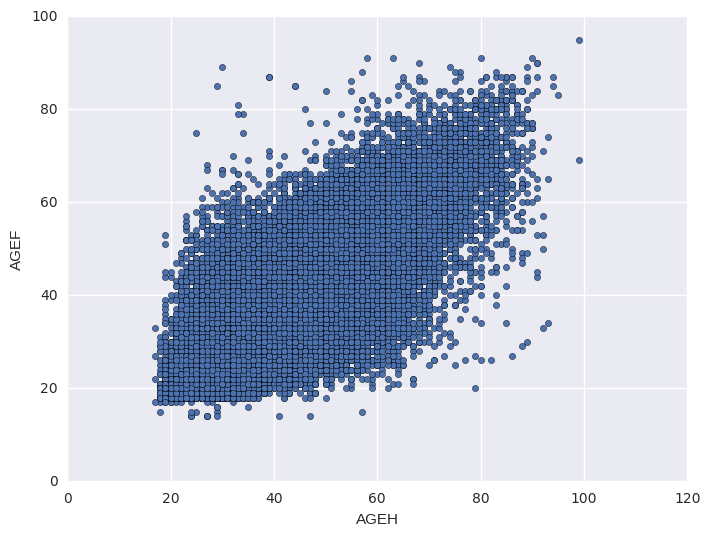

In [ ]:
#version pandas : df.plot()
#deux possibilités : l'option kind dans df.plot()
df.plot(x='AGEH',y='AGEF',kind='scatter')
#ou la méthode scatter()
#df.plot.scatter(x='AGEH',y='AGEF')
#ensemble des graphiques disponibles dans la méthode plot de pandas : df.plot.<TAB>

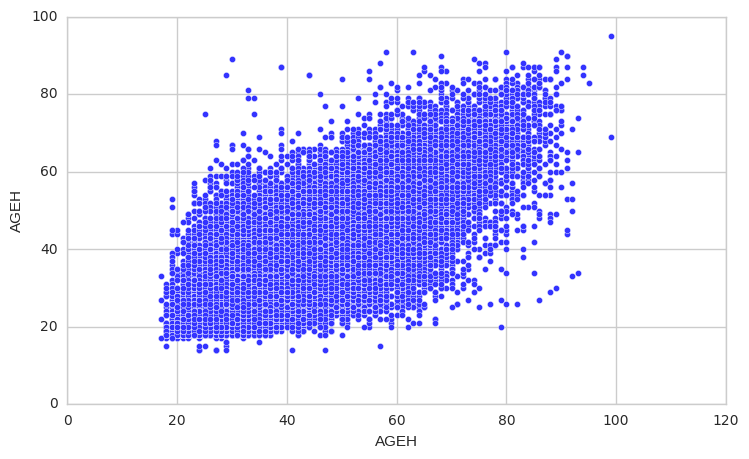

In [ ]:
#version matplotlib

from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize(8.5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['AGEH'],df['AGEF'], color="#3333FF", edgecolors='#FFFFFF')
plt.xlabel('AGEH')
plt.ylabel('AGEH')

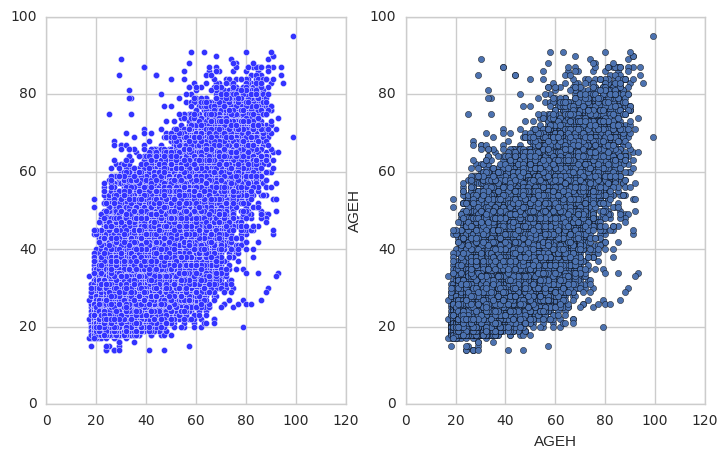

In [ ]:
#Si vous voulez les deux graphes en 1, il suffit de reprendre la structure de matplotlib 
#(notamment l'objet subplot) et de voir comment il peut etre appelé dans 
#chaque méthode de tracé (df.plot de pandas et sns.plot de searborn)

from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize(8.5,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['AGEH'],df['AGEF'], color="#3333FF", edgecolors='#FFFFFF')
df.plot(x='AGEH',y='AGEF',kind='scatter',ax=ax2)

plt.xlabel('AGEH')
plt.ylabel('AGEH')

### Exercice 1 : analyser l'âge des hommes en fonction de l'âge des femmes 

Ajoutez un titre, changez le style du graphe, faites varier les couleurs (avec un camaïeu), faites une [heatmap](https://en.wikipedia.org/wiki/Heat_map) avec le wrapper pandas [hexbin](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hexbin) et avec [seaborn](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html).

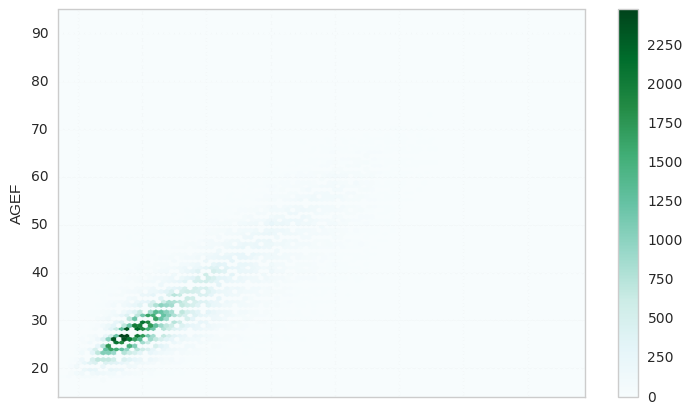

In [ ]:
df.plot.hexbin(x='AGEH', y='AGEF', gridsize=100)

Avec seaborn

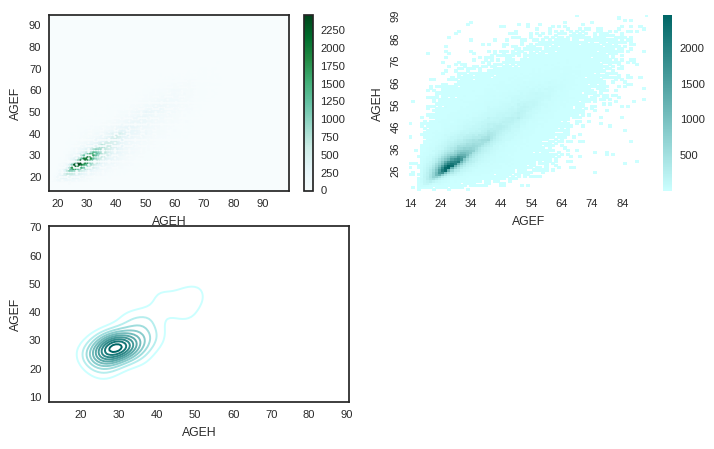

In [ ]:
import seaborn as sns

sns.set_style('white')
sns.set_context('paper')
#il faut crééer la matrice AGEH x AGEF
df['nb']=1
df[['AGEH','AGEF']]
df["nb"] = 1

#pour utiliser heatmap, il faut mettre df au frmat wide (au lieu de long) => df.pivot(...)
matrice = df[['nb','AGEH','AGEF']].groupby(['AGEH','AGEF'],as_index=False).count()
matrice=matrice.pivot('AGEH','AGEF','nb')
matrice=matrice.sort_index(axis=0,ascending=False)

fig = plt.figure(figsize(8.5,5))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

df.plot.hexbin(x='AGEH', y='AGEF', gridsize=100, ax=ax1)

cmap=sns.blend_palette(["#CCFFFF", "#006666"], as_cmap=True)
#Dans tous les graphes qui prévoient une fonction cmap vous pourrez intégrer votre propre palette de couleur

sns.heatmap(matrice,annot=False, xticklabels=10,yticklabels=10,cmap=cmap,ax=ax2)

sample = df.sample(100)
sns.kdeplot(sample['AGEH'],sample['AGEF'],cmap=cmap,ax=ax3)


Seaborn est bien pensé pour les [couleurs](). Vous pouvez intégrer des palettes convergentes, divergentes. Essayez de faire un camaïeu entre deux couleurs au fur et à mesure de l'age, pour faire ressortir les contrastes.

### Exercice 2 : représentez la répartition de la différence d'âge de couples mariés

In [ ]:
df["differenceHF"] = df["ANAISH"] - df["ANAISF"]
df["nb"] = 1
dist = df[["nb","differenceHF"]].groupby("differenceHF", as_index=False).count()
dist.tail()

,differenceHF,nb
95,46,1
96,48,3
97,50,1
98,56,1
99,59,1


/home/athean/anaconda3/envs/ensae/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


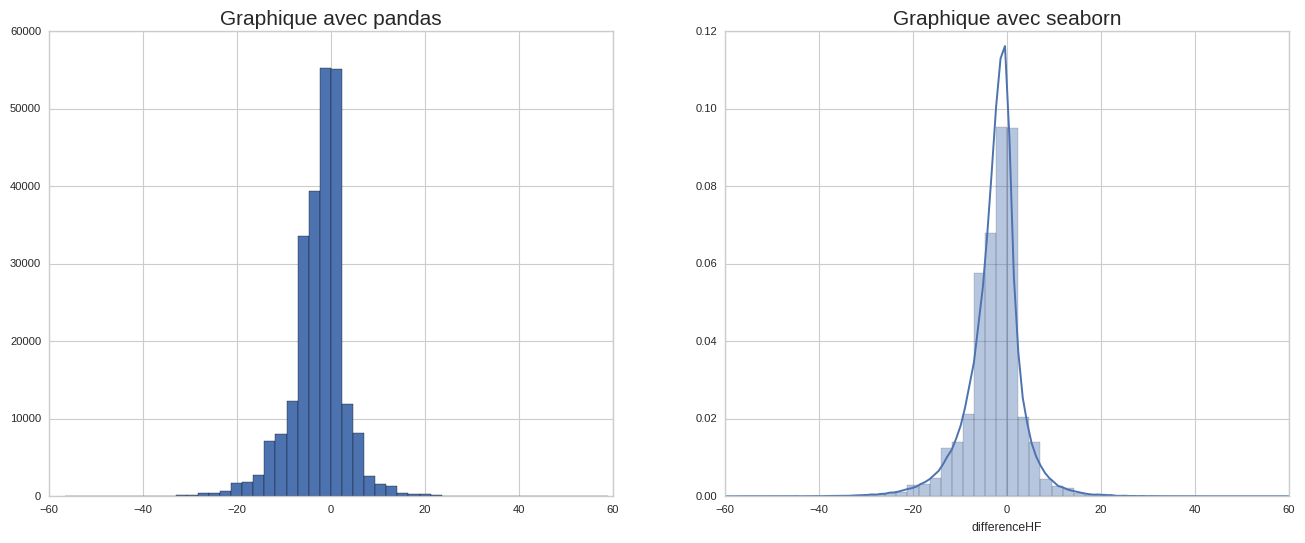

In [ ]:
#version pandas
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

fig = plt.figure(figsize(8.5,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df["differenceHF"].hist(figsize=(16,6), bins=50, ax=ax1)
ax1.set_title('Graphique avec pandas', fontsize=15)

sns.distplot(df["differenceHF"], kde=True,ax=ax2)
#regardez ce que donne l'option kde
ax2.set_title('Graphique avec seaborn', fontsize=15)

### Exercice 3 : analyser le nombre de mariages par département 

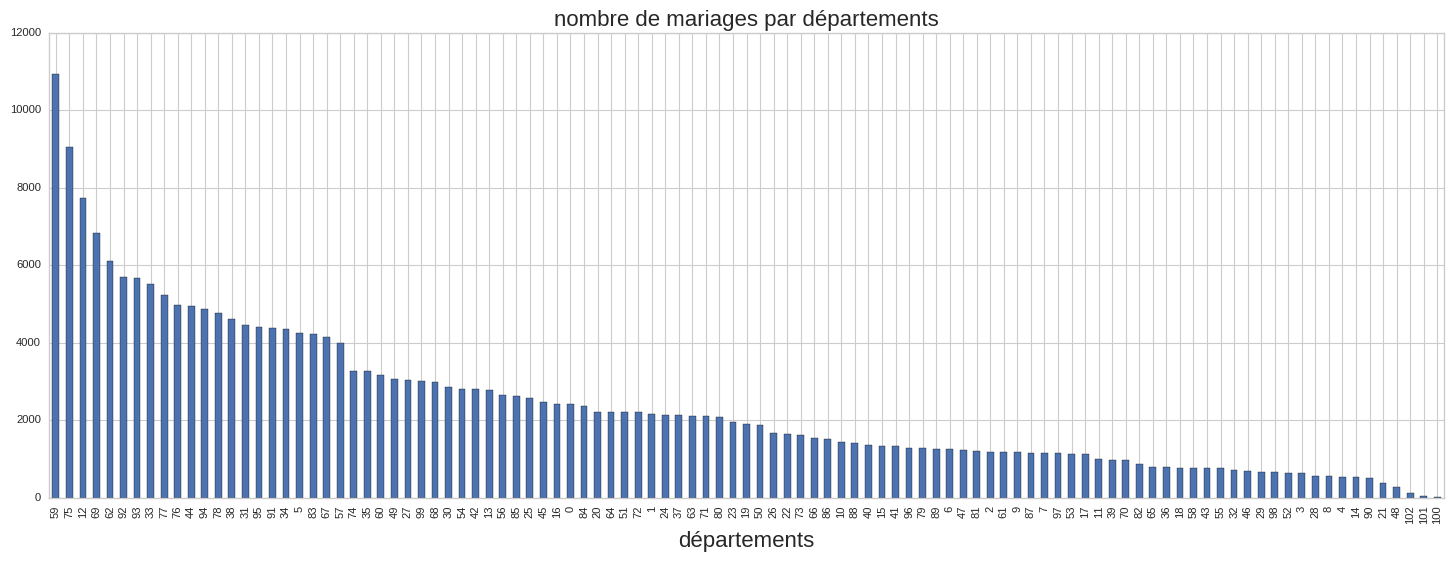

In [ ]:
df["nb"] = 1
dep = df[["DEPMAR","nb"]].groupby("DEPMAR", as_index=False).sum().sort_values("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(18,6))
ax.set_xlabel("départements", fontsize=16)
ax.set_title("nombre de mariages par départements", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

# on change la taille de police de certains labels
for i,tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 10 :
        tick.label.set_fontsize(8) 

# Exercice 4 : répartition du nombre de mariages par jour

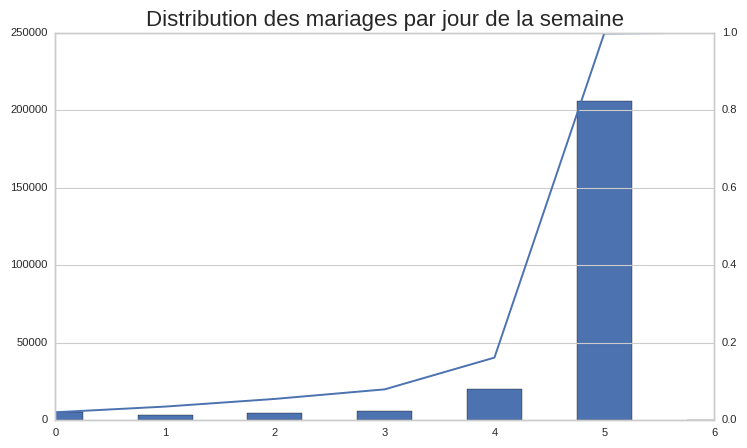

In [ ]:
df["nb"] = 1
dissem = df[["JSEMAINE","nb"]].groupby("JSEMAINE",as_index=False).sum()
total = dissem["nb"].sum()
repsem = dissem.cumsum() 
repsem["nb"] /= total

sns.set_style('whitegrid')
ax = dissem["nb"].plot(kind="bar")
repsem["nb"].plot(ax=ax, secondary_y=True)
ax.set_title("Distribution des mariages par jour de la semaine",fontsize=16)

In [ ]:
df.head()

,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM,AGEF,AGEH,nb,differenceHF
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,01,N,,9,28,30,1,-2
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,01,N,,9,43,56,1,-13
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,01,N,,9,20,30,1,-10
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,01,N,,9,25,27,1,-2
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,01,N,,9,49,44,1,5


# Graphes intéractifs : mpld3

Pour faire simple, il est possible d'introduire du JavaScript dans l'application web locale créée par jupyter. C'est ce que fait D3.js. Les librairies intéractives comme [mpld3](http://mpld3.github.io/) et [bokeh](http://bokeh.pydata.org/en/latest/), ont fait un "mapping" entre les objets matplotlib et ceux de D3.js. 

Résultat : il est possible de rendre intéractifs, sans trop d'efforts, vos graphiques matplolib. Inversement, vous pouvez customiser vos graphiques en introduisant du JS.

In [ ]:
from matplotlib import pyplot as plt
import mpld3

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize(8.5,5))
ax = fig.add_subplot(1,1,1)

sample = df.sample(500)

ax.scatter(sample['AGEH'],sample['AGEF'], color="#3333FF", edgecolors='#FFFFFF')
plt.xlabel('AGEH')
plt.ylabel('AGEH')

#il suffit de faire
mpld3.display()

Un plug-in intéressant de cette librairie le [paintbrush button](https://mpld3.github.io/_downloads/mpld3_demo.html#Plugins). Cela facilite l'exploration d'éventielles corrélations entre variables. 

In [ ]:
import numpy as np
n_walks = 10000
n_steps = 1000
steps = np.random.randint(0, 2, (n_walks, n_steps))
steps = 2*steps-1
walks = np.cumsum(steps, axis=1)
# on affiche le premier carré 10x10
walks[:10,:10]

array([[-1,  0,  1,  2,  1,  2,  3,  4,  3,  2],
       [-1, -2, -1,  0, -1,  0,  1,  0,  1,  2],
       [ 1,  0,  1,  2,  1,  0,  1,  0,  1,  2],
       [ 1,  0,  1,  2,  1,  0,  1,  2,  3,  2],
       [ 1,  0,  1,  0,  1,  2,  3,  2,  3,  2],
       [-1, -2, -3, -4, -5, -6, -5, -4, -5, -6],
       [-1, -2, -1, -2, -1,  0,  1,  2,  1,  2],
       [ 1,  0, -1, -2, -3, -4, -3, -4, -5, -4],
       [-1, -2, -1,  0, -1,  0,  1,  2,  3,  4],
       [ 1,  2,  1,  2,  3,  2,  1,  0, -1, -2]])

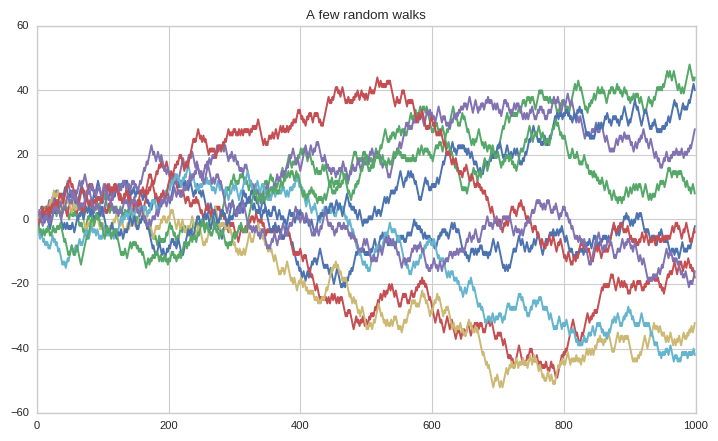

In [ ]:
import matplotlib.pyplot as plt
# let's have a quick look at a few random walks
plt.title('A few random walks')
plt.plot(walks[:10,:].transpose())
plt.figure()

Possibilité de faire ressortir les marches aléatoires en fonction du mouvement de la souris.

In [ ]:
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins, utils


class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}
        

# let's have a quick look at a few random walks
fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []})

plt.title('A few random walks')
lines=ax.plot(walks[:10,:].transpose(),lw=4, alpha=0.1)
        
plugins.connect(fig, HighlightLines(lines))

mpld3.display()

# Plotly

- Plotly: https://plot.ly/python/
- Doc: https://plot.ly/python/reference/
- Colors: http://www.cssportal.com/css3-rgba-generator/

In [ ]:
import pandas as pd
import numpy as np

# Creation dataframe

In [ ]:
indx = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
value1 = [0,1,2,3,4,5,6,7,8,9]
value2 = [1,5,2,3,7,5,1,8,9,1]

df = {'indx': indx, 'value1': value1, 'value2': value2}
df = pd.DataFrame(df)
df['rate1'] = df.value1 / 100
df['rate2'] = df.value2 / 100
df = df.set_index('indx')
df.head()

,value1,value2,rate1,rate2
indx,,,,
a,0,1,0.00,0.01
b,1,5,0.01,0.05
c,2,2,0.02,0.02
d,3,3,0.03,0.03
e,4,7,0.04,0.07


# Bars and Scatter

In [ ]:
# installer plotly

In [ ]:
import plotly.plotly as py
py.sign_in('elodie.royant@oscaro.com', 'zn3qxpv8yk')

In [ ]:
import plotly 
from plotly.graph_objs import Bar, Scatter, Figure, Layout
import plotly.plotly as py
import plotly.graph_objs as go

# BARS

trace1 = go.Bar(
    x = df.index,
    y = df.value1,
    name='Value1',                          # Bar legend
    #orientation = 'h',
    marker = dict(                          # Colors
        color = 'rgba(237, 74, 51, 0.6)',
        line = dict(
            color = 'rgba(237, 74, 51, 0.6)',
            width = 3)
    )
)

trace2 = go.Bar(
    x = df.index,
    y = df.value2,
    name='Value 2',
    #orientation = 'h',                      # Uncomment to have horizontal bars
    marker = dict(
        color = 'rgba(0, 74, 240, 0.4)',
        line = dict(
            color = 'rgba(0, 74, 240, 0.4)',
            width = 3)
    )
)


# SCATTER

trace3 = go.Scatter(
    x = df.index,
    y = df.rate1, 
    name='Rate',                            
    yaxis='y2',                             # Define 2 axis
    marker = dict(                          # Colors
        color = 'rgba(187, 0, 0, 1)',
    )
)
trace4 = go.Scatter(
    x = df.index,
    y = df.rate2,
    name='Rate2',
    yaxis='y2',                             # To have a 2nd axis
    marker = dict(                          # Colors
        color = 'rgba(0, 74, 240, 0.4)',
    )
)


data = [trace2, trace1, trace3, trace4]


layout = go.Layout(
    title='Stack bars and scatter',
    barmode ='stack',                          # Take value 'stack' or 'group'
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(                                # Params 1st axis
       #range=[0,1200000],                     # Set range
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ), 
    yaxis2=dict(                               # Params 2nd axis
        overlaying='y',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        autotick=True,
        ticks='',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~athean/0 or inside your plot.ly account where it is named 'marker-h-bar'


In [ ]:
trace5 = go.Scatter(
    x = ['h', 'h'],
    y = [0,0.09],                        
    yaxis='y2',                             # Define 2 axis
    showlegend = False,                     # Hiding legend for this trace
    marker = dict(                          # Colors
        color = 'rgba(46, 138, 24, 1)',
    )
)

from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


fig = tools.make_subplots(rows=1, cols=2)

# 1st subplot
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# 2nd subplot
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)              # Vertical line here


fig['layout'].update(height=600, width=1000, title='Two in One  & Vertical line')
py.iplot(fig, filename='make-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Exercice : représenter le nombre de mariages par département avec plotly